# Loading Libraries

In [2]:
!pip install control
!pip install torch==1.7.0 

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as MSE

import control.matlab 
import matplotlib.pyplot as plt
import math as mt

     |████████████████████████████████| 339 kB 7.1 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344929 sha256=fc7dc169f0ca8095a39e7557579e746aef9a023f81ceb976ac9e331d2279b90c
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control
     |████████████████████████████████| 776.7 MB 4.6 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0+cu102 requires torch==1.9.0, but you have torch 1.7.0 which is incompatible.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.7.0 which is incompatible.


# Synthetic data generation

In [3]:
series1 = pd.read_csv('/content/Input.csv')
temp = pd.read_csv('/content/Output.csv')
disturbance = pd.read_csv('/content/Disturbance+added.csv')
only_input = pd.read_csv('/content/Only_manipulated_input.csv')
plant_measurement = pd.read_csv('/content/test_P_measurement_0.25.csv')
states_with_noise = pd.read_csv('/content/True_states_PRocessnoise.csv')


#######################################################
estimated_using_1stprinciple = pd.read_csv('/content/CSTR+-+State+estimation+using+1st+principle.csv')
#######################################################

temp = np.asarray(temp)
series1 = np.asarray(series1)
disturbance = np.array(disturbance)
only_input = np.array(only_input)
plant_measurement = np.array(plant_measurement)
states_with_noise = np.array(states_with_noise)
estimated_using_1stprinciple = np.array(estimated_using_1stprinciple)

print('Length of the total dataset:',len(series1))

#######################################################
temp[:,0] = 100*temp[:,0]
#print(temp)
#######################################################

series_temp = temp[:15000]
series = series1[:15000]
series_disturbance = disturbance[:15000]
series_onlyinput = only_input[:15000]
series_plantmeasurement = plant_measurement[:15000]
series_statewithnoise = states_with_noise[:15000]

series_test = series1[15000:16666]
series_test_temp = temp[15000:16666]
series_test_disturbance = disturbance[15000:16666]
series_test_onlyinput = only_input[15000:16666]
series_test_plantmeasurement = plant_measurement[15000:16666]
series_test_statewithnoise = states_with_noise[15000:16666]

print('Length of the training set:',len(series),'\nLength of test set:',len(series_test))



Length of the total dataset: 19998
Length of the training set: 15000 
Length of test set: 1666


In [4]:
print('Input:',series.shape, type(series))
print('Output:',series_temp.shape, type(series_temp))
print('disturbance:',series_disturbance.shape,type(series_disturbance))
print('Only manipulated input:',series_onlyinput.shape,type(series_onlyinput))
print('Plant measurement:',series_plantmeasurement.shape,type(series_plantmeasurement))
print('Only manipulated input:',series_statewithnoise.shape,type(series_statewithnoise))

Input: (15000, 4) <class 'numpy.ndarray'>
Output: (15000, 2) <class 'numpy.ndarray'>
disturbance: (15000, 1) <class 'numpy.ndarray'>
Only manipulated input: (15000, 2) <class 'numpy.ndarray'>
Plant measurement: (15000, 1) <class 'numpy.ndarray'>
Only manipulated input: (15000, 2) <class 'numpy.ndarray'>


In [5]:
print('manipulated input:\n',series,'\n')
print('temp: \n',series_temp,'\n')
print('Disturbance: \n', series_disturbance,'\n')
print('Only manipulated input: \n', series_onlyinput,'\n')

manipulated input:
 [[9.0000e-01 1.3500e+01 3.9395e+02 2.6449e-01]
 [9.0000e-01 1.3500e+01 3.9528e+02 2.4712e-01]
 [9.0000e-01 1.3500e+01 3.9571e+02 2.3385e-01]
 ...
 [1.1000e+00 1.6500e+01 3.9497e+02 2.7689e-01]
 [1.1000e+00 1.6500e+01 3.9499e+02 2.7516e-01]
 [9.0000e-01 1.3500e+01 3.9488e+02 2.7479e-01]] 

temp: 
 [[ 24.712 395.28 ]
 [ 23.385 395.71 ]
 [ 22.842 395.26 ]
 ...
 [ 27.516 394.99 ]
 [ 27.479 394.88 ]
 [ 27.571 394.7  ]] 

Disturbance: 
 [[1.9934]
 [2.0004]
 [2.0104]
 ...
 [2.0076]
 [2.0026]
 [2.0173]] 

Only manipulated input: 
 [[ 0.9 13.5]
 [ 0.9 13.5]
 [ 0.9 13.5]
 ...
 [ 1.1 16.5]
 [ 1.1 16.5]
 [ 0.9 13.5]] 



#Visualization


(15000, 4)


Text(0.5, 1.0, 'Temperature vs time instant')

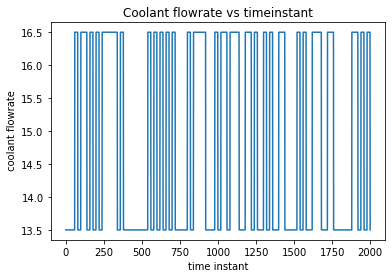

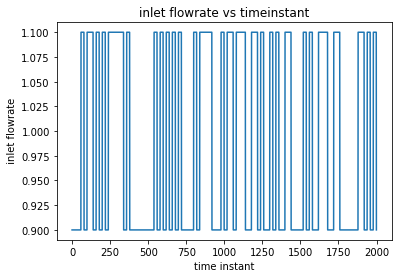

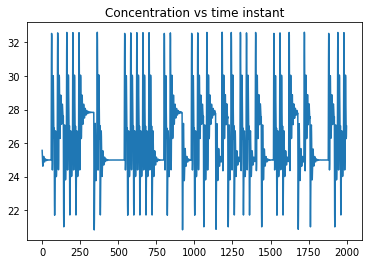

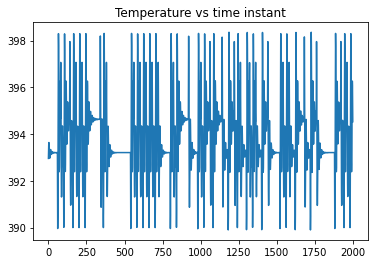

In [6]:
print(series.shape)
plt.figure(1)
plt.plot(series[1000:3000,1])
plt.xlabel('time instant')
plt.ylabel(' coolant flowrate')
plt.title('Coolant flowrate vs timeinstant')

plt.figure(2)
plt.plot(series[1000:3000,0])
plt.xlabel('time instant')
plt.ylabel(' inlet flowrate')
plt.title('inlet flowrate vs timeinstant')

plt.figure(3)
plt.plot(series_temp[1000:3000,0])
# print(series_temp[0:100,0])
plt.title('Concentration vs time instant')

plt.figure(4)
plt.plot(series_temp[1000:3000,1])
# print(series_temp[0:100,0])
plt.title('Temperature vs time instant')

# DataLoader Function

In [7]:
def Dataloader(seriesss,target,T):
     
     data4 = []
     output = []

     for i in range(len(seriesss)-T):
         x = seriesss[i:i+T]
         data4.append(x)

         y = target[i+T-1]
         output.append(y)

     data4 = np.asarray(data4)
     output = np.asarray(output)

     data4 = data4.reshape(-1,T,4)
     output = output.reshape(-1,2)# change when output length changes


     return data4,output

# Generate Data Loader

In [8]:
T = 10
data = []
target = []

for item in range(len(series)-T):

    x = series[item:item+T]
    data.append(x)

    y = series_temp[item+T-1]
    target.append(y)

data = np.asarray(data)
target = np.asarray(target)

print(data.shape, target.shape)

data = data.reshape(-1,T,4)
target = target.reshape(-1,2)   # use .reshape(-1,1) for predicting only temp

print('Shape of the dataloader:',data.shape,'\nShape of target variable', target.shape)

N = len(data)        # As now number of windows is equal to number of samples


(14990, 10, 4) (14990, 2)
Shape of the dataloader: (14990, 10, 4) 
Shape of target variable (14990, 2)


In [9]:
# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Model making

In [10]:
class SimpleRNN(nn.Module):
    def __init__(self,n_input, n_hidden, n_rnnlayers, n_outputs):
        super(SimpleRNN, self).__init__()

        torch.manual_seed(1)
        self.D = n_input
        self.M = n_hidden
        self.K = n_outputs
        #self.O = 3 
        self.L = n_rnnlayers

        # note batch_first = True
        # applies the convention that out data will be shape:
        # (num_samples, sequence length, num_features)
        # rather than :
        # (sequence_length, num_samples, num_features )

        self.rnn = nn.RNN(
            input_size = self.D,
            hidden_size = self.M,
            num_layers = self.L,
            nonlinearity = 'relu',
            batch_first = True,
            #dropout = 0.001
        )

#########################################################
        self.fc = nn.Linear(self.M,self.K)
#########################################################

        # self.fc = nn.Linear(self.M,self.O)
        # self.final = nn.Linear(self.O,self.K)

    def forward(self,data):
        # initial hidden states

        h0 = torch.zeros(self.L,data.size(0),self.M).to(device)

        # get RNN unit output
        # out is of size (N,T,M)
        # 2nd return value is hidden states at each hidden layer
        # we don't need those right now 

        #######################out,_ = self.rnn(data,h0)

        out_h2, out_h1 = self.rnn(data,h0) # new adjustment




        # we only want h(T) at the final time step
        # N x M --> N x K

        #######################out = self.fc(out[:,-1,:])
        out = self.fc(out_h2[:,-1,:])    #new adjustment
        return out,out_h1


# Load saved model

In [12]:
#Before using this run Simple RNN cell

#loading entire model
model = torch.load('model_without_noise2.pth')

print(model)

SimpleRNN(
  (rnn): RNN(4, 8, num_layers=2, batch_first=True)
  (fc): Linear(in_features=8, out_features=2, bias=True)
)


# Instantiating the model ( skip this if loading model )

In [71]:
# Instantiate the model
model = SimpleRNN(n_input = 4, n_hidden = 8, n_rnnlayers = 2, n_outputs = 2) #changed to 2 when both state estimated
model.to(device)


SimpleRNN(
  (rnn): RNN(4, 8, num_layers=2, batch_first=True)
  (fc): Linear(in_features=8, out_features=2, bias=True)
)

# Loss and Optimizer ( skip this if loading model )

In [ ]:
# Loss and Optimizer

criterion = nn.MSELoss()
opt = torch.optim.Adam(model.parameters() , lr = 0.00015)

# Splitting into train and validation

In [18]:
x_train = torch.from_numpy(data[:13333].astype(np.float32))
y_train = torch.from_numpy(target[:13333].astype(np.float32))
x_test = torch.from_numpy(data[13333:].astype(np.float32))
y_test = torch.from_numpy(target[13333:].astype(np.float32))

x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

print(f' Train input set: {type(x_train), x_train.shape}, Test input: {type(x_test), x_test.shape} ')
print(f' Train target set: {type(y_train), y_train.shape}, Test target: {type(y_test), y_test.shape} ')


 Train input set: (<class 'torch.Tensor'>, torch.Size([13333, 10, 4])), Test input: (<class 'torch.Tensor'>, torch.Size([1657, 10, 4])) 
 Train target set: (<class 'torch.Tensor'>, torch.Size([13333, 2])), Test target: (<class 'torch.Tensor'>, torch.Size([1657, 2])) 


# Full gradient descent ALGO ( skip this if loading model )

In [ ]:

def fullgd (x_train,y_train, x_test,y_test,epochs,model,criterion,opt):
    loss_train = []
    loss_test = []

    for epoch in range(epochs):

        opt.zero_grad()

        output = model(x_train)
        loss = criterion(output, y_train)

        loss.backward()
        opt.step()

        loss_train.append(loss.item())

        with torch.no_grad():
            testoutput = model(x_test)
            losstest = criterion(testoutput,y_test)
            loss_test.append(losstest.item())
            
            if (epoch+1)%500 == 0:

                print(f'Epoch: {epoch+1}/{epochs}, Train loss:{loss.item(): .4f}, Test loss:{losstest.item(): .4f}')


    return loss_train,loss_test



# Training of the model ( skip this if loading model )

In [ ]:
epochs = 210000

loss_train,loss_test =fullgd(x_train,y_train, x_test,y_test,epochs,model,criterion,opt)


Epoch: 500/210000, Train loss: 978.2969, Test loss: 895.7047
Epoch: 1000/210000, Train loss: 3.8387, Test loss: 3.6518
Epoch: 1500/210000, Train loss: 3.8378, Test loss: 3.6510
Epoch: 2000/210000, Train loss: 3.8367, Test loss: 3.6499
Epoch: 2500/210000, Train loss: 3.8352, Test loss: 3.6483
Epoch: 3000/210000, Train loss: 3.8332, Test loss: 3.6464
Epoch: 3500/210000, Train loss: 3.8305, Test loss: 3.6438
Epoch: 4000/210000, Train loss: 3.8272, Test loss: 3.6405
Epoch: 4500/210000, Train loss: 3.8229, Test loss: 3.6363
Epoch: 5000/210000, Train loss: 3.8175, Test loss: 3.6310
Epoch: 5500/210000, Train loss: 3.8107, Test loss: 3.6242
Epoch: 6000/210000, Train loss: 3.8021, Test loss: 3.6158
Epoch: 6500/210000, Train loss: 3.7913, Test loss: 3.6052
Epoch: 7000/210000, Train loss: 3.7780, Test loss: 3.5921
Epoch: 7500/210000, Train loss: 3.7617, Test loss: 3.5759
Epoch: 8000/210000, Train loss: 3.7418, Test loss: 3.5562
Epoch: 8500/210000, Train loss: 3.7177, Test loss: 3.5324
Epoch: 9000

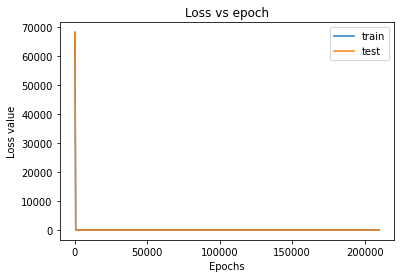

In [ ]:
plt.plot(loss_train, label='train')
plt.plot(loss_test , label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.title('Loss vs epoch')
plt.legend()

# Saving the trained model ( skip this if loading model )

In [ ]:
#saving entire model
torch.save(model, 'model_without_noise2.pth')

# download checkpoint file
files.download('model_without_noise2.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Before using this run Simple RNN cell

#loading entire model
model = torch.load('model1.pth')

# Weights

In [72]:
## WEIGHTS AND BIAS FOR OUTPUT LAYER
w, b = model.fc.parameters()

In [73]:
print('Weights for output layer',w)
print('\nBias for the output layer',b)

Weights for output layer Parameter containing:
tensor([[ 0.2039,  0.2173, -0.0205, -0.0435,  0.3213,  0.3091, -0.2005,  0.3459],
        [ 0.0875, -0.2349,  0.1935, -0.2640,  0.3267, -0.2273,  0.1000,  0.1077]],
       device='cuda:0', requires_grad=True)

Bias for the output layer Parameter containing:
tensor([0.0841, 0.2932], device='cuda:0', requires_grad=True)


In [74]:
## WEIGHTS AND BIAS FOR RNN
W_xh, W_hh1, b_xh, b_hh1, W_xh2, W_hh2, b_xh2, b_hh2 = model.rnn.parameters()

In [75]:
print('Weights between input and 1st hidden layer:',W_xh)
print('\n Bias between input and 1st hidden layer:',b_xh)
print('\n Weights between neurons of 1st hidden layer:',W_hh1)
print('\n Bias between neurons of 1st hidden layer:',b_hh1)

print('Weights between 1st hidden layer & 2nd hidden layer:',W_xh2)
print('\n Bias between 1st hidden layer & 2nd hidden layer:',b_xh2)
print('\n Weights between neurons of 2nd hidden layer:',W_hh2)
print('\n Bias between neurons of 2nd hidden layer:',b_hh2)

Weights between input and 1st hidden layer: Parameter containing:
tensor([[ 0.1822, -0.1561, -0.0685,  0.1659],
        [-0.3328,  0.2120, -0.0727,  0.1799],
        [ 0.0491, -0.0433,  0.0981,  0.0174],
        [ 0.1291, -0.1378, -0.0258, -0.0318],
        [ 0.0512, -0.0014,  0.3091,  0.1100],
        [-0.1317, -0.2135, -0.0593, -0.1525],
        [-0.1133,  0.0169,  0.2108,  0.1922],
        [-0.3456,  0.2192,  0.0988,  0.3354]], device='cuda:0',
       requires_grad=True)

 Bias between input and 1st hidden layer: Parameter containing:
tensor([ 0.1206,  0.0633, -0.1504, -0.1070,  0.3238, -0.0654,  0.1993,  0.1531],
       device='cuda:0', requires_grad=True)

 Weights between neurons of 1st hidden layer: Parameter containing:
tensor([[ 0.2334, -0.3221, -0.3362, -0.1705,  0.3105, -0.0589,  0.1513, -0.1643],
        [ 0.3469, -0.1496,  0.2651,  0.0042, -0.1863,  0.1817, -0.1877,  0.1040],
        [-0.1021, -0.0388, -0.3399, -0.1686,  0.1919, -0.0859,  0.3522,  0.2834],
        [-0.0166

# Plots for scaled data

## Train plots

In [23]:
_, True_states = Dataloader(series,series_statewithnoise,10)
True_states2 = True_states[:13333]
True_states2[:,0] = 100*True_states2[:,0]

In [24]:
True_states[13333:].shape

(1657, 2)

error conc model vs true value 0.19866535
0.13638064
0.3426155888330998
0.3176343874069248


Text(0.5, 1.0, 'Training Plot: Error vs Time')

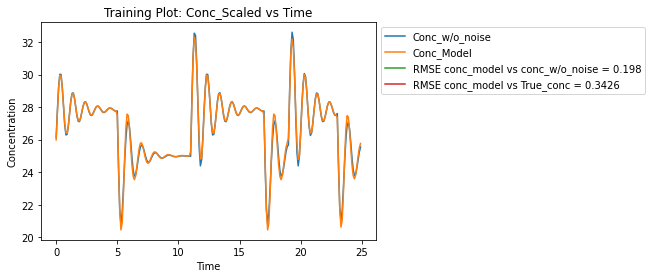

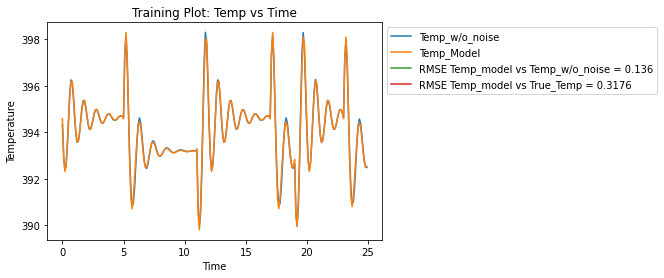

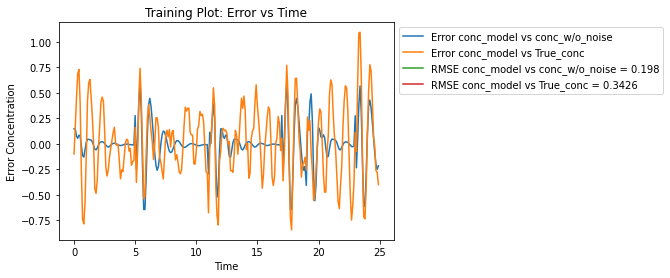

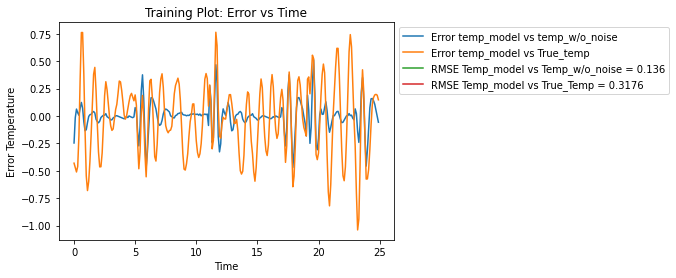

In [25]:
#true = target[200:450]
true = y_train.detach().cpu().numpy()

# checktrain = torch.from_numpy(data[200:450].astype(np.float32))
# checktrain = checktrain.to(device)

checktrain = x_train

p_result = model(checktrain)
p = p_result[0].cpu().detach().numpy()

###########################

# p[:,0] = p[:,0]/100
##########################
error_train_conc = MSE(true[:,0],p[:,0])
error_train_conc_graph = true[:,0]-p[:,0]
error_train_temp = MSE(true[:,1],p[:,1])
error_train_temp_graph = true[:,1]-p[:,1]
error_train_conc2 = MSE(True_states2[:,0],p[:,0])
error_train_conc2_graph = True_states2[:,0]-p[:,0]
error_train_temp2 = MSE(True_states2[:,1],p[:,1])
error_train_temp2_graph = True_states2[:,1]-p[:,1]



print('error conc model vs true value',np.sqrt(error_train_conc))
print(np.sqrt(error_train_temp))

print(np.sqrt(error_train_conc2))
print(np.sqrt(error_train_temp2))

x = 0.1*np.arange(0,len(checktrain[200:450,0]))
plt.figure(1)
plt.plot(x,true[200:450,0], label='Conc_w/o_noise')
plt.plot(x, p[200:450,0], label='Conc_Model')
plt.plot([], [], label='RMSE conc_model vs conc_w/o_noise = 0.198')
plt.plot([], [], label='RMSE conc_model vs True_conc = 0.3426')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Training Plot: Conc_Scaled vs Time')

plt.figure(2)
plt.plot(x,true[200:450,1], label='Temp_w/o_noise')
plt.plot(x, p[200:450,1], label='Temp_Model')
plt.plot([], [], label='RMSE Temp_model vs Temp_w/o_noise = 0.136')
plt.plot([], [], label='RMSE Temp_model vs True_Temp = 0.3176')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Training Plot: Temp vs Time')

plt.figure(3)
plt.plot(x,error_train_conc_graph[200:450], label='Error conc_model vs conc_w/o_noise')
plt.plot(x,error_train_conc2_graph[200:450], label='Error conc_model vs True_conc')
plt.plot([], [], label='RMSE conc_model vs conc_w/o_noise = 0.198')
plt.plot([], [], label='RMSE conc_model vs True_conc = 0.3426')
plt.xlabel('Time')
plt.ylabel('Error Concentration')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Training Plot: Error vs Time')

plt.figure(4)
plt.plot(x,error_train_temp_graph[200:450], label='Error temp_model vs temp_w/o_noise')
plt.plot(x,error_train_temp2_graph[200:450], label='Error temp_model vs True_temp')
plt.plot([], [], label='RMSE Temp_model vs Temp_w/o_noise = 0.136')
plt.plot([], [], label='RMSE Temp_model vs True_Temp = 0.3176')
plt.xlabel('Time')
plt.ylabel('Error Temperature')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Training Plot: Error vs Time')

## Validation plot

In [26]:
# validating_target = target[13333:13520]

validating_target = y_test.detach().cpu().numpy()
validating_predictions = []
i=0

while len(validating_predictions)<len(validating_target):

    input_ = x_test[i].view(1,T,4)    # convert the x_test[i] which is 2d to 3d
    p_result = model(input_)

    j= np.array(p_result[0].detach().cpu())

    validating_predictions.append(j)

    i+=1

validating_predictions = np.array(validating_predictions).reshape(-1,2)
# validating_predictions = np.asarray(validating_predictions)
print(validating_predictions.shape)
print(validating_target.shape)



(1657, 2)
(1657, 2)


0.189056
0.13100873
0.35509661647062424
0.33823561062773305


Text(0.5, 1.0, 'Validation Plot: Error vs Time')

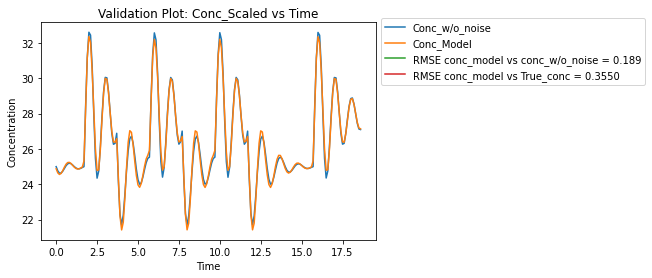

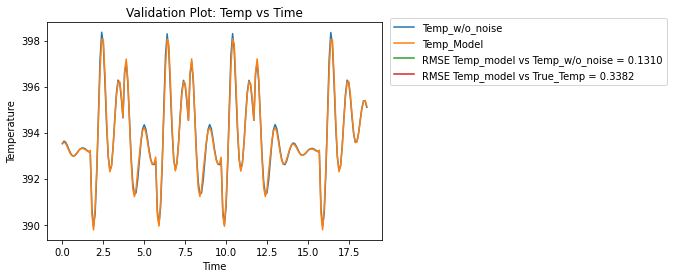

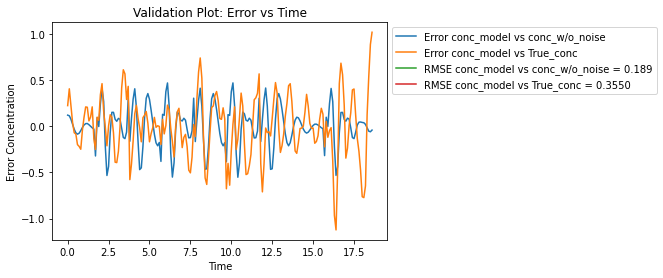

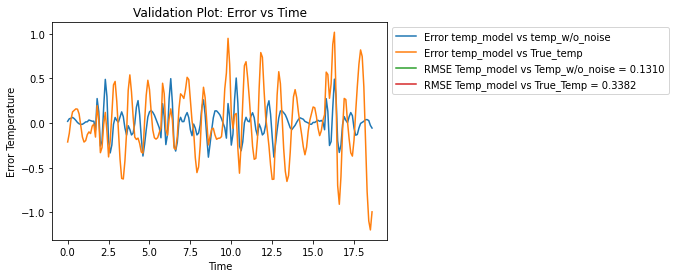

In [27]:
x = 0.1*np.arange(0,len(validating_target[:187,0]))


_, True_states = Dataloader(series,series_statewithnoise,10)
True_states2 = True_states[13333:]
True_states2[:,0] = 100*True_states2[:,0]

error_train_conc = MSE(validating_target[:,0],validating_predictions[:,0])
error_train_conc_graph = validating_target[:,0]-validating_predictions[:,0]
error_train_temp = MSE(validating_target[:,1],validating_predictions[:,1])
error_train_temp_graph = validating_target[:,1]-validating_predictions[:,1]
error_train_conc2 = MSE(True_states2[:,0],validating_predictions[:,0])
error_train_conc2_graph = True_states2[:,0]-validating_predictions[:,0]
error_train_temp2 = MSE(True_states2[:,1],validating_predictions[:,1])
error_train_temp2_graph = True_states2[:,1]-validating_predictions[:,1]


print(np.sqrt(error_train_conc))
print(np.sqrt(error_train_temp))
print(np.sqrt(error_train_conc2))
print(np.sqrt(error_train_temp2))


plt.figure(1)
plt.plot(x,validating_target[:187,0], label='Conc_w/o_noise')
plt.plot(x,validating_predictions[:187,0], label='Conc_Model')
plt.plot([],[], label='RMSE conc_model vs conc_w/o_noise = 0.189')
plt.plot([],[], label='RMSE conc_model vs True_conc = 0.3550')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend(bbox_to_anchor=(1.82, 0.69),loc = 'lower right')
plt.title('Validation Plot: Conc_Scaled vs Time')

plt.figure(2)
plt.plot(x,validating_target[:187,1], label='Temp_w/o_noise')
plt.plot(x,validating_predictions[:187,1], label='Temp_Model')
plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1310')
plt.plot([],[], label='RMSE Temp_model vs True_Temp = 0.3382')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend(bbox_to_anchor=(1.865, 0.69),loc = 'lower right')
plt.title('Validation Plot: Temp vs Time')


plt.figure(3)
plt.plot(x,error_train_conc_graph[:187], label='Error conc_model vs conc_w/o_noise')
plt.plot(x,error_train_conc2_graph[:187], label='Error conc_model vs True_conc')
plt.plot([],[], label='RMSE conc_model vs conc_w/o_noise = 0.189')
plt.plot([],[], label='RMSE conc_model vs True_conc = 0.3550')
plt.xlabel('Time')
plt.ylabel('Error Concentration')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Validation Plot: Error vs Time')

plt.figure(4)
plt.plot(x,error_train_temp_graph[:187], label='Error temp_model vs temp_w/o_noise')
plt.plot(x,error_train_temp2_graph[:187], label='Error temp_model vs True_temp')
plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1310')
plt.plot([],[], label='RMSE Temp_model vs True_Temp = 0.3382')
plt.xlabel('Time')
plt.ylabel('Error Temperature')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Validation Plot: Error vs Time')

## Test Plots

## dataloader function

In [28]:
def Dataloader(seriesss,target,T):
     
     data4 = []
     output = []

     for i in range(len(seriesss)-T):
         x = seriesss[i:i+T]
         data4.append(x)

         y = target[i+T-1]
         output.append(y)

     data4 = np.asarray(data4)
     output = np.asarray(output)

     data4 = data4.reshape(-1,T,4)
     output = output.reshape(-1,2)# change when output length changes


     return data4,output

In [29]:
print(series_test.shape)
print(series_test_temp.shape)

(1666, 4)
(1666, 2)


In [30]:
test_output = series_test_temp

inputtest, outputtest = Dataloader(series_test, test_output,T)

print(inputtest.shape,outputtest.shape)

print(type(inputtest))

inputtest = torch.from_numpy(inputtest.astype(np.float32))
print(type(inputtest))

inputtest = inputtest.to(device)

print(outputtest)

(1656, 10, 4) (1656, 2)
<class 'numpy.ndarray'>
<class 'torch.Tensor'>
[[ 26.668 392.6  ]
 [ 25.829 393.6  ]
 [ 24.878 394.33 ]
 ...
 [ 32.541 390.53 ]
 [ 32.394 392.27 ]
 [ 30.668 394.75 ]]


## Applying model

In [31]:
with torch.no_grad():
    testset_predictions = model(inputtest)

    testset_predictions = np.asarray(testset_predictions[0].cpu())
    
print(testset_predictions.shape)

(1656, 2)


## Visualization

In [32]:

_, True_states = Dataloader(series_test,series_test_statewithnoise,10)
True_states2 = True_states
True_states2[:,0] = 100*True_states2[:,0]


0.18974048942637795
0.12949798049191477
0.3332629486216929
0.30310119702201677


Text(0.5, 1.0, 'Test Plot: Error vs Time')

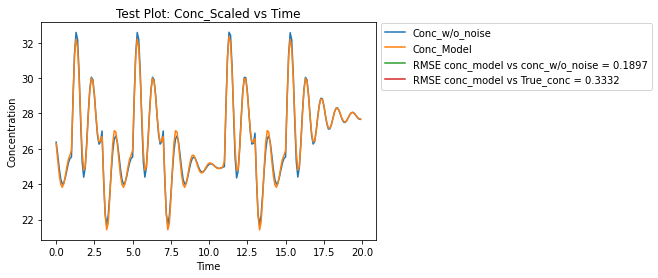

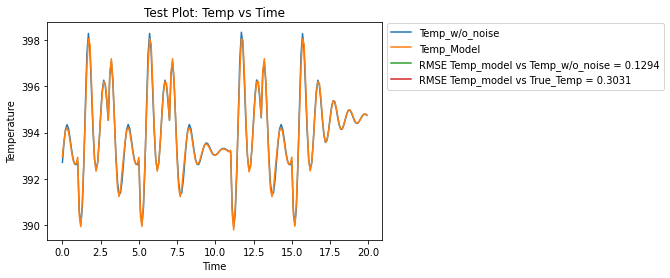

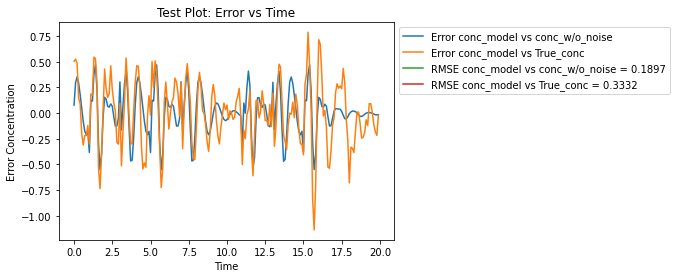

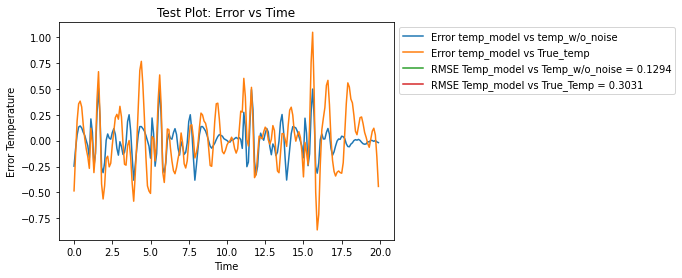

In [33]:
x = 0.1*np.arange(0,len(testset_predictions[600:800,0]))


error_train_conc = MSE(outputtest[:,0],testset_predictions[:,0])
error_train_temp = MSE(outputtest[:,1],testset_predictions[:,1])
error_train_conc2 = MSE(True_states2[:,0],testset_predictions[:,0])
error_train_temp2 = MSE(True_states2[:,1],testset_predictions[:,1])

error_train_conc_graph = outputtest[:,0]-testset_predictions[:,0]
error_train_temp_graph = outputtest[:,1]-testset_predictions[:,1]
error_train_conc2_graph = True_states2[:,0]-testset_predictions[:,0]
error_train_temp2_graph = True_states2[:,1]-testset_predictions[:,1]

print(np.sqrt(error_train_conc))
print(np.sqrt(error_train_temp))
print(np.sqrt(error_train_conc2))
print(np.sqrt(error_train_temp2))


plt.figure(1)
plt.plot(x,outputtest[600:800,0], label = 'Conc_w/o_noise')
plt.plot(x,testset_predictions[600:800,0],label='Conc_Model')
plt.plot([],[], label='RMSE conc_model vs conc_w/o_noise = 0.1897')
plt.plot([],[], label='RMSE conc_model vs True_conc = 0.3332')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Test Plot: Conc_Scaled vs Time')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best')

plt.figure(2)
plt.plot(x,outputtest[600:800,1], label = 'Temp_w/o_noise')
plt.plot(x,testset_predictions[600:800,1],label='Temp_Model')
plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1294')
plt.plot([],[], label='RMSE Temp_model vs True_Temp = 0.3031')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Test Plot: Temp vs Time')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best')


plt.figure(3)
plt.plot(x,error_train_conc_graph[600:800], label='Error conc_model vs conc_w/o_noise')
plt.plot(x,error_train_conc2_graph[600:800], label='Error conc_model vs True_conc')
plt.plot([],[], label='RMSE conc_model vs conc_w/o_noise = 0.1897')
plt.plot([],[], label='RMSE conc_model vs True_conc = 0.3332')
plt.xlabel('Time')
plt.ylabel('Error Concentration')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Test Plot: Error vs Time')

plt.figure(4)
plt.plot(x,error_train_temp_graph[600:800], label='Error temp_model vs temp_w/o_noise')
plt.plot(x,error_train_temp2_graph[600:800], label='Error temp_model vs True_temp')
plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1294')
plt.plot([],[], label='RMSE Temp_model vs True_Temp = 0.3031')
plt.xlabel('Time')
plt.ylabel('Error Temperature')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Test Plot: Error vs Time')


# Plots for inverse scaled (T&C)

In [34]:
_, True_states = Dataloader(series,series_statewithnoise,10)
True_states2 = True_states[:13333]

0.0019866535
0.13638064
0.0034261558292253635
0.3176343874069248


Text(0.5, 1.0, 'Training Plot: Temperature vs Time instant')

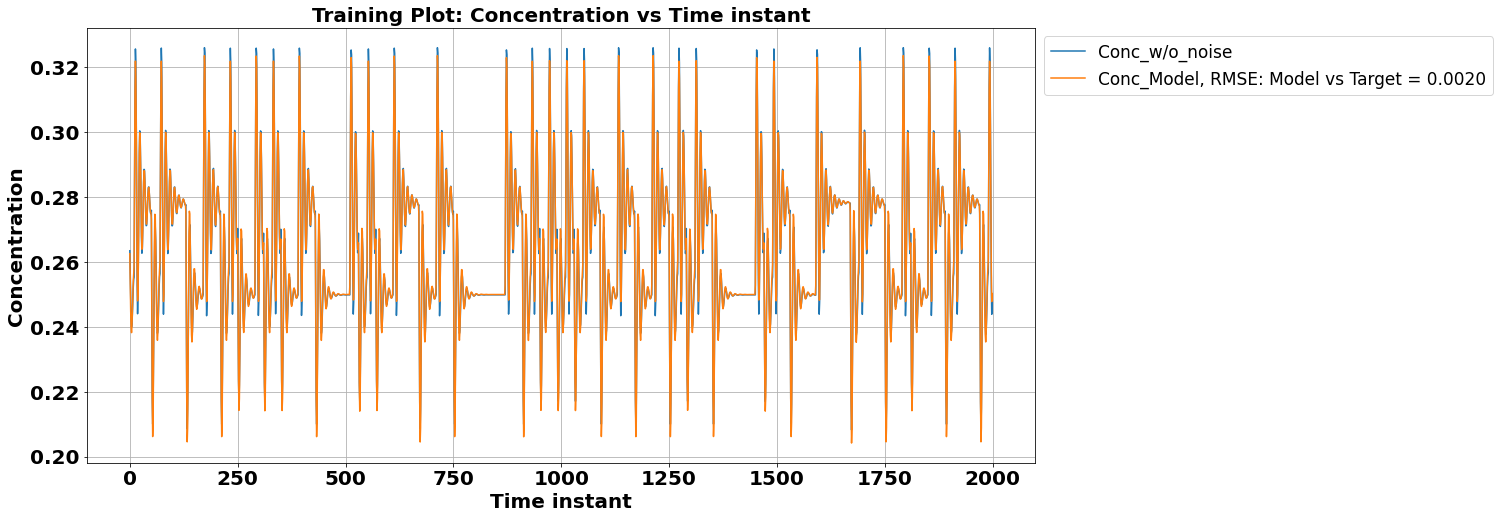

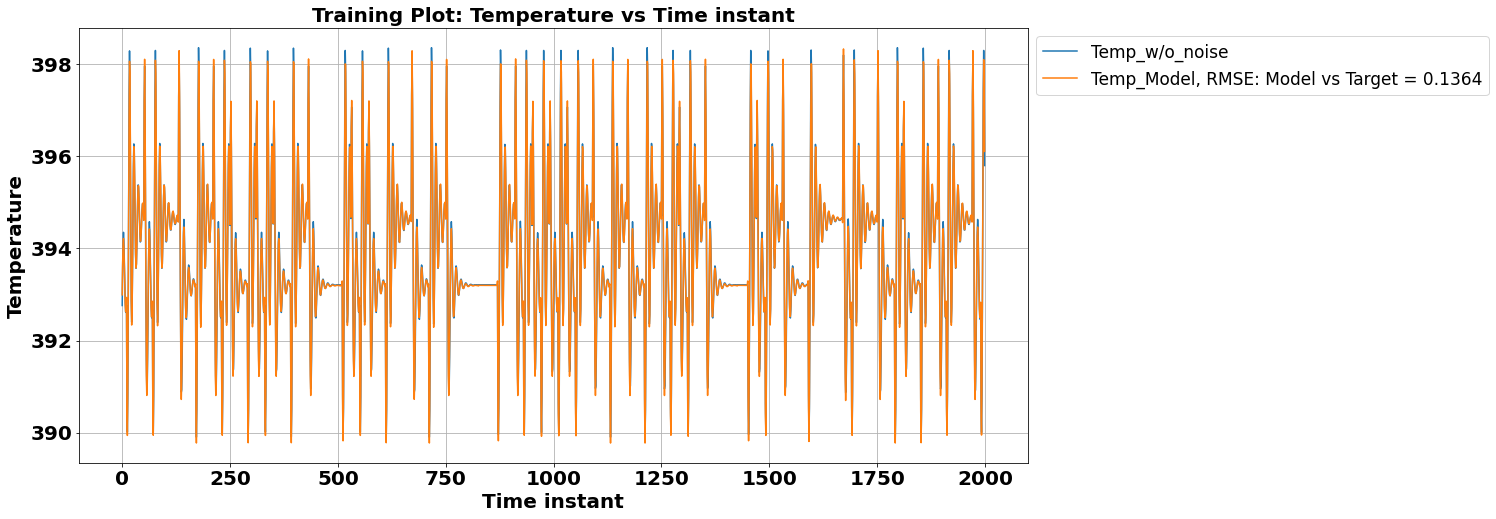

In [35]:
#true = target[200:450]
true = y_train.detach().cpu().numpy()
true[:,0] = true[:,0]/100
# checktrain = torch.from_numpy(data[200:450].astype(np.float32))
# checktrain = checktrain.to(device)

checktrain = x_train

p_result = model(checktrain)
p = p_result[0].cpu().detach().numpy()

###########################

p[:,0] = p[:,0]/100
##########################
error_train_conc = MSE(true[:,0],p[:,0])
error_train_temp = MSE(true[:,1],p[:,1])
error_train_conc2 = MSE(True_states2[:,0],p[:,0])
error_train_temp2 = MSE(True_states2[:,1],p[:,1])

error_train_conc_graph = true[:,0]-p[:,0]
error_train_temp_graph = true[:,1]-p[:,1]
error_train_conc2_graph = True_states2[:,0]-p[:,0]
error_train_temp2_graph = True_states2[:,1]-p[:,1]

print(np.sqrt(error_train_conc))
print(np.sqrt(error_train_temp))

print(np.sqrt(error_train_conc2))
print(np.sqrt(error_train_temp2))

x = np.arange(0,len(checktrain[2000:4000]))
plt.figure(figsize=(17,8))
plt.plot(x,true[2000:4000,0], label='Conc_w/o_noise')
plt.plot(x, p[2000:4000,0], label='Conc_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_conc)))
# plt.plot([], [], label='RMSE conc_model vs conc_w/o_noise = 0.00198')
# plt.plot([], [], label='RMSE conc_model vs True_conc = 0.003426')
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Concentration',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.legend(bbox_to_anchor=(1, 1),loc='upper left',fontsize=17)
plt.title('Training Plot: Concentration vs Time instant',fontsize=20, fontweight='bold')

plt.figure(figsize=(17,8))
plt.plot(x,true[2000:4000,1], label='Temp_w/o_noise')
plt.plot(x, p[2000:4000,1], label='Temp_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_temp)))
# plt.plot([], [], label='RMSE Temp_model vs Temp_w/o_noise = 0.136')
# plt.plot([], [], label='RMSE Temp_model vs True_Temp = 0.3176')
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Temperature',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.legend(bbox_to_anchor=(1, 1),loc='upper left',fontsize=17)
plt.title('Training Plot: Temperature vs Time instant',fontsize=20, fontweight='bold')



## Validation Step

In [36]:
validating_target = y_test.detach().cpu().numpy()

validating_target[:,0] = validating_target[:,0]/100
validating_predictions = []
i=0

while len(validating_predictions)<len(validating_target):

    input_ = x_test[i].view(1,T,4)    # convert the x_test[i] which is 2d to 3d
    p = model(input_)

    j= np.array(p[0].detach().cpu())

    validating_predictions.append(j)

    i+=1

validating_predictions = np.array(validating_predictions).reshape(-1,2)
# validating_predictions = np.asarray(validating_predictions)
print(validating_predictions.shape)
print(validating_target.shape)


##########################################################

validating_predictions[:,0] = validating_predictions[:,0]/100

##########################################################

(1657, 2)
(1657, 2)


0.0018905603
0.13100873
0.003550966305895059
0.33823561062773305


Text(0.5, 1.0, 'Validation Plot: Temperature vs Time instant')

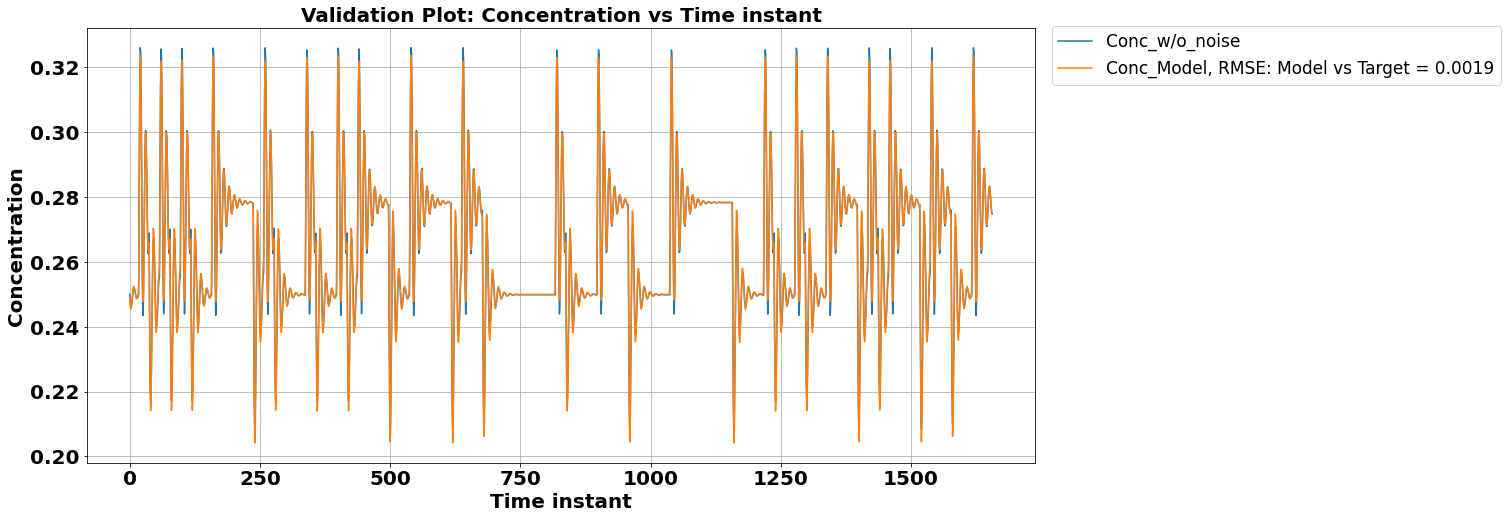

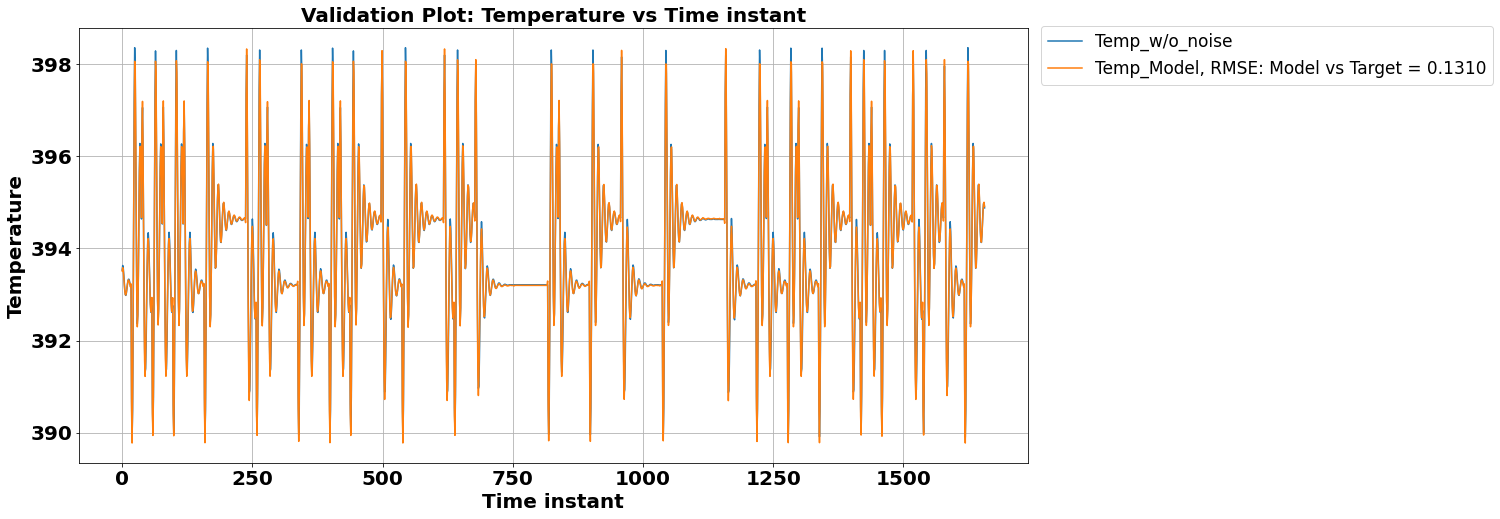

In [37]:



_, True_states = Dataloader(series,series_statewithnoise,10)
True_states2 = True_states[13333:]
True_states2[:,0] = True_states2[:,0]

error_train_conc = MSE(validating_target[:,0],validating_predictions[:,0])
error_train_temp = MSE(validating_target[:,1],validating_predictions[:,1])
error_train_conc2 = MSE(True_states2[:,0],validating_predictions[:,0])
error_train_temp2 = MSE(True_states2[:,1],validating_predictions[:,1])

error_train_conc_graph = validating_target[:,0]-validating_predictions[:,0]
error_train_temp_graph = validating_target[:,1]-validating_predictions[:,1]
error_train_conc2_graph = True_states2[:,0]-validating_predictions[:,0]
error_train_temp2_graph = True_states2[:,1]-validating_predictions[:,1]

print(np.sqrt(error_train_conc))
print(np.sqrt(error_train_temp))
print(np.sqrt(error_train_conc2))
print(np.sqrt(error_train_temp2))




x = np.arange(0,len(validating_target[:,0]))

plt.figure(figsize=(17,8))
plt.plot(x,validating_target[:,0], label='Conc_w/o_noise')
plt.plot(x,validating_predictions[:,0], label='Conc_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_conc)))
# plt.plot([],[], label='RMSE conc_model vs conc_w/o_noise = 0.00189')
# plt.plot([],[], label='RMSE conc_model vs True_conc = 0.003550')
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Concentration',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.legend(bbox_to_anchor=(1.5, 0.85),loc = 'lower right',fontsize=17)
plt.title('Validation Plot: Concentration vs Time instant',fontsize=20, fontweight='bold')

plt.figure(figsize=(17,8))
plt.plot(x,validating_target[:,1], label='Temp_w/o_noise')
plt.plot(x,validating_predictions[:,1],label='Temp_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_temp)))
# plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1310')
# plt.plot([],[], label='RMSE Temp_model vs True_Temp = 0.3382')
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Temperature',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.legend(bbox_to_anchor=(1.5, 0.85),loc = 'lower right',fontsize=17)
plt.title('Validation Plot: Temperature vs Time instant',fontsize=20, fontweight='bold')

# plt.figure(3)
# plt.plot(x,error_train_conc_graph[:187], label='Error conc_model vs conc_w/o_noise')
# plt.plot(x,error_train_conc2_graph[:187], label='Error conc_model vs True_conc')
# plt.plot([],[], label='RMSE conc_model vs conc_w/o_noise = 0.00189')
# plt.plot([],[], label='RMSE conc_model vs True_conc = 0.003550')
# plt.xlabel('Time')
# plt.ylabel('Error Concentration')
# plt.legend(bbox_to_anchor=(1, 1))
# plt.title('Validation Plot: Error vs Time')

# plt.figure(4)
# plt.plot(x,error_train_temp_graph[:187], label='Error temp_model vs temp_w/o_noise')
# plt.plot(x,error_train_temp2_graph[:187], label='Error temp_model vs True_temp')
# plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1310')
# plt.plot([],[], label='RMSE Temp_model vs True_Temp = 0.3382')
# plt.xlabel('Time')
# plt.ylabel('Error Temperature')
# plt.legend(bbox_to_anchor=(1, 1))
# plt.title('Validation Plot: Error vs Time')






## Testing set

## dataloader function

In [38]:
 def Dataloader(seriesss,target,T):
     
     data4 = []
     output = []

     for i in range(len(seriesss)-T):
         x = seriesss[i:i+T]
         data4.append(x)

         y = target[i+T-1]
         output.append(y)

     data4 = np.asarray(data4)
     output = np.asarray(output)

     data4 = data4.reshape(-1,T,4)
     output = output.reshape(-1,2)# change when output length changes


     return data4,output

In [39]:
print(series_test.shape)
print(series_test_temp.shape)


(1666, 4)
(1666, 2)


In [40]:
print(series_test_temp)

[[ 24.23  397.23 ]
 [ 21.784 397.96 ]
 [ 21.001 396.86 ]
 ...
 [ 32.394 392.27 ]
 [ 30.668 394.75 ]
 [ 27.97  397.12 ]]


In [41]:
print(series_test)

[[9.0000e-01 1.3500e+01 3.9470e+02 2.7571e-01]
 [9.0000e-01 1.3500e+01 3.9723e+02 2.4230e-01]
 [9.0000e-01 1.3500e+01 3.9796e+02 2.1784e-01]
 ...
 [1.1000e+00 1.6500e+01 3.9053e+02 3.2541e-01]
 [1.1000e+00 1.6500e+01 3.9227e+02 3.2394e-01]
 [1.1000e+00 1.6500e+01 3.9475e+02 3.0668e-01]]


In [42]:

test_output = series_test_temp

inputtest, outputtest = Dataloader(series_test, test_output,T)

print(inputtest.shape,outputtest.shape)

print(type(inputtest))

inputtest = torch.from_numpy(inputtest.astype(np.float32))
print(type(inputtest))

inputtest = inputtest.to(device)

print(outputtest)

(1656, 10, 4) (1656, 2)
<class 'numpy.ndarray'>
<class 'torch.Tensor'>
[[ 26.668 392.6  ]
 [ 25.829 393.6  ]
 [ 24.878 394.33 ]
 ...
 [ 32.541 390.53 ]
 [ 32.394 392.27 ]
 [ 30.668 394.75 ]]


## Applying model

In [43]:
with torch.no_grad():
    testset_predictions = model(inputtest)

    testset_predictions = np.asarray(testset_predictions[0].cpu())
    
print(testset_predictions.shape)

(1656, 2)


In [44]:
## CONVERTING BACK THE SCALED CONC
############################################################

outputtest[:,0] = outputtest[:,0]/100
testset_predictions[:,0] = testset_predictions[:,0]/100

############################################################

# print(outputtest[:,0]/1000)

In [45]:
testset_predictions[:,0]

array([0.26568362, 0.2545891 , 0.24447209, ..., 0.32303432, 0.32000095,
       0.30415994], dtype=float32)

##Visualization

In [46]:

_, True_states = Dataloader(series_test,series_test_statewithnoise,10)
True_states2 = True_states
True_states2[:,0] = True_states2[:,0]


0.0018974049140324824
0.12949798049191477
0.0033326296025690486
0.30310119702201677


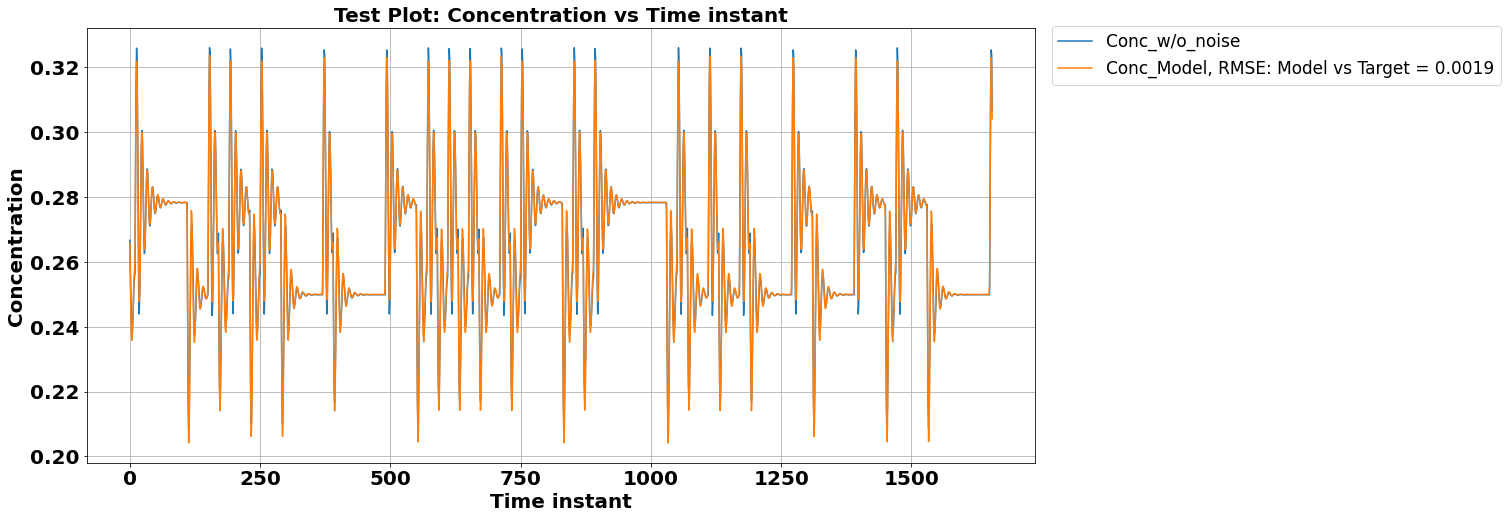

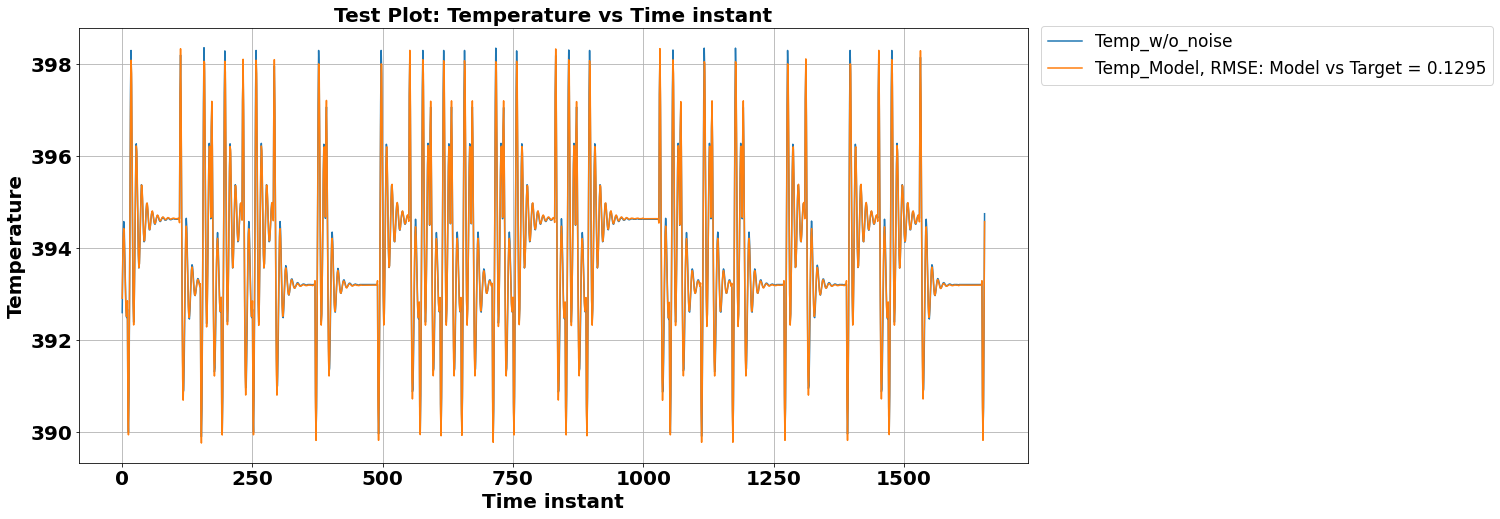

In [47]:
x = np.arange(0,len(testset_predictions[600:800,0]))


error_train_conc = MSE(outputtest[:,0],testset_predictions[:,0])
error_train_temp = MSE(outputtest[:,1],testset_predictions[:,1])
error_train_conc2 = MSE(True_states2[:,0],testset_predictions[:,0])
error_train_temp2 = MSE(True_states2[:,1],testset_predictions[:,1])

error_train_conc_graph = outputtest[:,0]-testset_predictions[:,0]
error_train_temp_graph = outputtest[:,1]-testset_predictions[:,1]
error_train_conc2_graph = True_states2[:,0]-testset_predictions[:,0]
error_train_temp2_graph = True_states2[:,1]-testset_predictions[:,1]

print(np.sqrt(error_train_conc))
print(np.sqrt(error_train_temp))
print(np.sqrt(error_train_conc2))
print(np.sqrt(error_train_temp2))


x = np.arange(0,len(testset_predictions[:,0]))

plt.figure(figsize=(17,8))
plt.plot(x,outputtest[:,0], label = 'Conc_w/o_noise')
plt.plot(x,testset_predictions[:,0], label='Conc_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_conc)))
# plt.plot([],[], label='RMSE conc_model vs conc_w/o_noise = 0.001897')
# plt.plot([],[], label='RMSE conc_model vs True_conc = 0.003332')
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Concentration',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.title('Test Plot: Concentration vs Time instant',fontsize=20, fontweight='bold')
plt.legend(bbox_to_anchor=(1.5, 0.85),loc = 'lower right',fontsize=17)

plt.figure(figsize=(17,8))
plt.plot(x,outputtest[:,1], label = 'Temp_w/o_noise')
plt.plot(x,testset_predictions[:,1],label='Temp_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_temp)) )
# plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1294')
# plt.plot([],[], label='RMSE Temp_model vs True_Temp = 0.3031')
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Temperature',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.title('Test Plot: Temperature vs Time instant',fontsize=20, fontweight='bold')
plt.legend(bbox_to_anchor=(1.5, 0.85),loc = 'lower right',fontsize=17)



# Multistep Prediction using model

## Preparing Data

In [48]:
# using dataloader to generate data:


inputnew, outputnew = Dataloader(series_test, series_test_temp,T)
print(inputnew.shape,outputnew.shape)
print('\nType of input data:',type(inputnew))

inputnew = torch.from_numpy(inputnew.astype(np.float32))
print('\nType of input data:',type(inputnew))
print('\nType of output data:',type(outputnew))

inputnew = inputnew.to(device)

(1656, 10, 4) (1656, 2)

Type of input data: <class 'numpy.ndarray'>

Type of input data: <class 'torch.Tensor'>

Type of output data: <class 'numpy.ndarray'>


In [49]:
inputnew[0].view(T,4)

tensor([[9.0000e-01, 1.3500e+01, 3.9470e+02, 2.7571e-01],
        [9.0000e-01, 1.3500e+01, 3.9723e+02, 2.4230e-01],
        [9.0000e-01, 1.3500e+01, 3.9796e+02, 2.1784e-01],
        [9.0000e-01, 1.3500e+01, 3.9686e+02, 2.1001e-01],
        [9.0000e-01, 1.3500e+01, 3.9488e+02, 2.1638e-01],
        [9.0000e-01, 1.3500e+01, 3.9295e+02, 2.3051e-01],
        [9.0000e-01, 1.3500e+01, 3.9159e+02, 2.4654e-01],
        [9.0000e-01, 1.3500e+01, 3.9095e+02, 2.6020e-01],
        [9.0000e-01, 1.3500e+01, 3.9102e+02, 2.6872e-01],
        [9.0000e-01, 1.3500e+01, 3.9164e+02, 2.7080e-01]], device='cuda:0')

In [50]:


validating_predictions = []

last_x = inputnew[0].view(T,4)
i=0
while len(validating_predictions)<(len(outputnew)-1):
    i = i+1
    input_ = last_x.reshape(1,T,4)    # done as input needs 3 dimension (needs 1 as batch dimension too !!)
    p = model(input_)
    validating_predictions.append(p[0].detach().cpu().numpy())
    #last_x = inputnew[i].view(T,4)

    last_x[0] = last_x[1]
    last_x[1] = last_x[2]
    last_x[2] = last_x[3]
    last_x[3] = last_x[4]
    last_x[4] = last_x[5]
    last_x[5] = last_x[6]
    last_x[6] = last_x[7]
    last_x[7] = last_x[8]
    last_x[8] = last_x[9]

    last_x[9][0] = inputnew[i][9,0]
    last_x[9][1] = inputnew[i][9,1]

    # last_x[9][2] = p[0,1].detach().item()      # substituting TEmp with predicted temp
    # last_x[9][3] = (p[0,0].detach().item())/100 # substituting Temp with predicted conc
    last_x[9][2] = p[0][0,1].detach().item()            # substituting TEmp with predicted temp
    last_x[9][3] = (p[0][0,0].detach().item())/100      # substituting Temp with predicted conc



print(type(validating_predictions))
validating_predictions = np.asarray(validating_predictions).reshape(-1,2)



<class 'list'>


In [51]:

_, True_states = Dataloader(series_test,series_test_statewithnoise,10)
True_states2 = True_states
True_states2[:,0] = 100*True_states2[:,0]


## Visualization

0.38828127023898745
0.4208379831158175
0.4773407999725814
0.5043073469116204


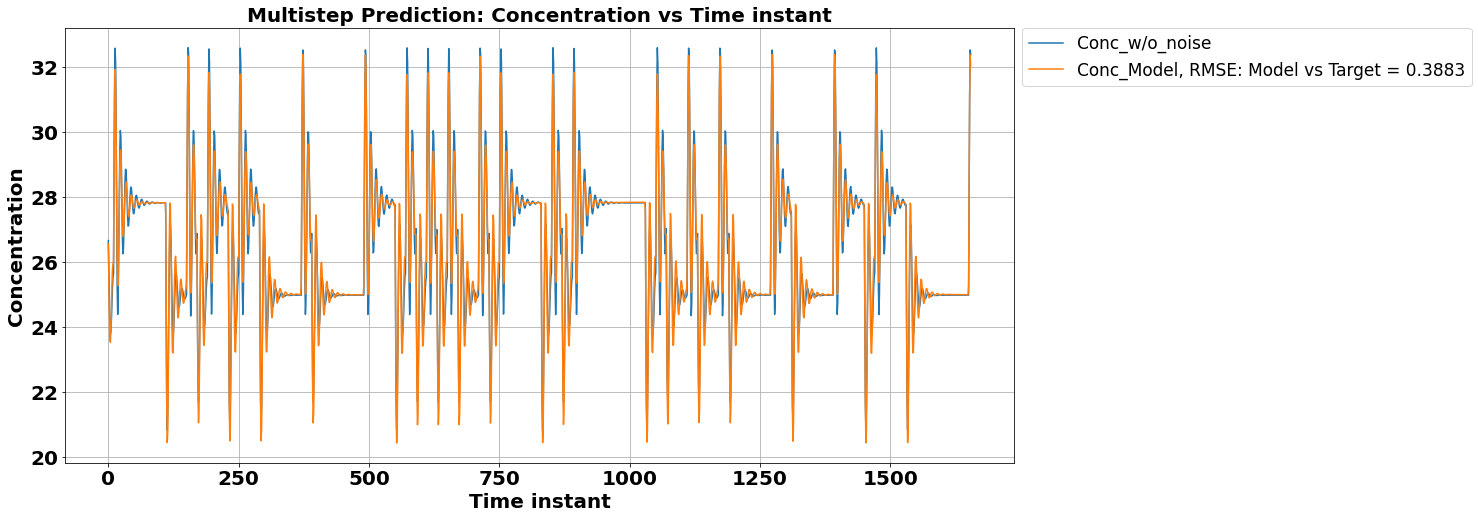

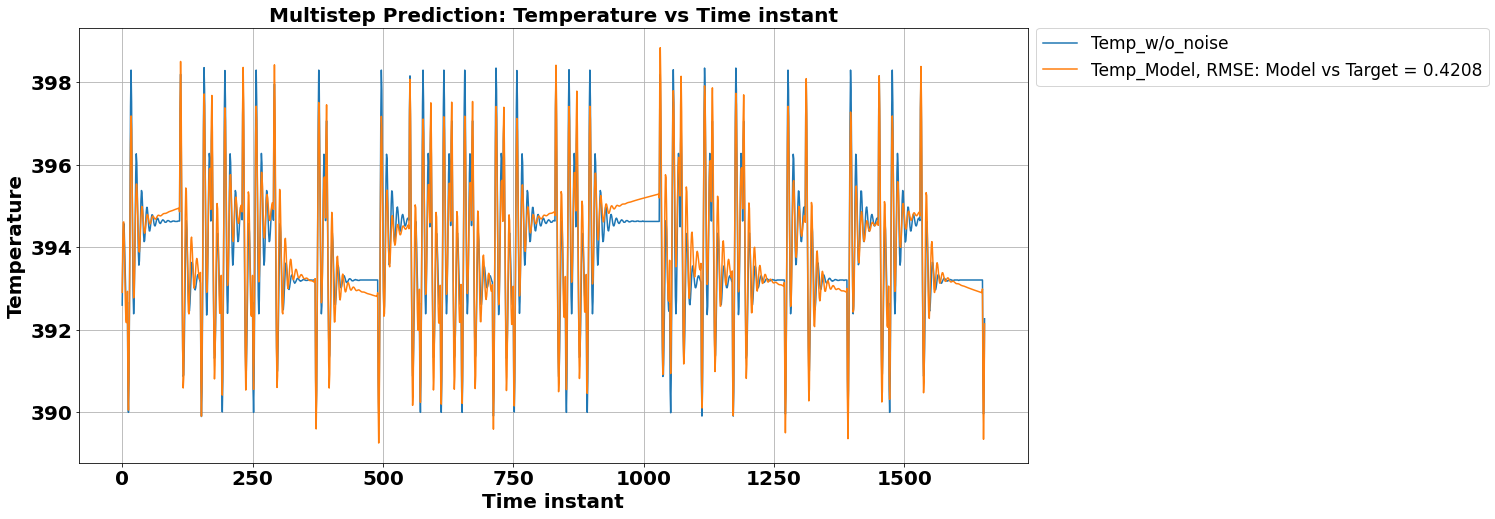

In [54]:
error_train_conc = MSE(outputnew[:1655,0],validating_predictions[:,0])
error_train_temp = MSE(outputnew[:1655,1],validating_predictions[:,1])
error_train_conc2 = MSE(True_states2[:1655,0],validating_predictions[:,0])
error_train_temp2 = MSE(True_states2[:1655,1],validating_predictions[:,1])

error_train_conc_graph = outputnew[:1655,0]-validating_predictions[:,0]
error_train_temp_graph = outputnew[:1655,1]-validating_predictions[:,1]
error_train_conc2_graph = True_states2[:1655,0]-validating_predictions[:,0]
error_train_temp2_graph = True_states2[:1655,1]-validating_predictions[:,1]

print(np.sqrt(error_train_conc))
print(np.sqrt(error_train_temp))
print(np.sqrt(error_train_conc2))
print(np.sqrt(error_train_temp2))





time = [i for i in range(1655)]

time = np.array(time)


plt.figure(figsize=(17,8))

plt.plot(time,outputnew[:1655,0], label = 'Conc_w/o_noise')
plt.plot(time,validating_predictions[:,0], label='Conc_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_conc)))
# plt.plot([],[], label = 'RMSE MSP: Conc_model vs Conc_w/o_noise = 0.2502')
# plt.plot([],[], label = 'RMSE MSP: Conc_model vs Conc_True = 0.3708')
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Concentration',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.title('Multistep Prediction: Concentration vs Time instant',fontsize=20, fontweight='bold')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best',fontsize=17)

plt.figure(figsize=(17,8))

plt.plot(time,outputnew[:1655,1], label = 'Temp_w/o_noise')
plt.plot(time,validating_predictions[:,1],label='Temp_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_temp)))
# plt.plot([],[], label = 'RMSE MSP: Temp_model vs Temp_w/o_noise = 0.3746')
# plt.plot([],[], label = 'RMSE MSP: Temp_model vs Temp_True = 0.4604')
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Temperature',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.title('Multistep Prediction: Temperature vs Time instant',fontsize=20, fontweight='bold')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best',fontsize=17)


# EKF

### Prepared phi matrix but the size of the matrix doesnt match with others as now states increases henc e have to make further modifications

In [55]:


def EKF(x_est, x_pred, cov_est, u, yk, d,hidden1,hidden2,phi_test) :
    
    n_st =18
    n_op = 1
    n_ip=2

    #Q = 0.012**2
    Q = np.diagflat([0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2])

    R = 0.25**2      ## Change if measurement noise changed

    #C = [0,1]
    C = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]      #this changed as there are 18 states now

    C = np.array(C)
    C = np.mat(C) 

    #x_est = x_est.reshape(n_st,1)
    x_pred = x_pred.reshape(n_st,1)
    yk = yk.reshape(n_op,1)
    u = u.reshape(n_ip,1)
    d= d.reshape(1,1)



###############################  FOR CHECKING IF HIDDEN VALUE 0 THEN MAKE CHANGES IN PHI ################
########################################### PHi from RNN ################################



    for i in range(len(hidden1[0])):

        if hidden1[0][i]==0:
            for j in range(18):
                phi_test[i][j]=0
                phi_test[j][i]=0

    for i in range(len(hidden2[0])):

        if hidden2[0][i]==0:
            for j in range(18):
                phi_test[i+8][j]=0
                phi_test[j][i+8]=0


    
######################################################################################

    phi_EKF = phi_test



    # one line calc gammad

    C_lin = C
    
    cov_pred = np.dot(phi_EKF,np.dot(cov_est,phi_EKF.T)) + Q
    
    #cov_pred = np.dot(phi_EKF,np.dot(cov_est,phi_EKF.T)) + gamma_bd*Q*gamma_bd.T
    kgain = np.dot(C_lin,np.dot(cov_pred,C_lin.T)) + R
    inv_kgain = kgain.I
    K_gain = np.dot(cov_pred,np.dot(C_lin.T,inv_kgain))

    y_pred = np.dot(C_lin,x_pred)
    y_pred = y_pred.reshape(n_op,1)

    x_est = x_pred + np.dot(K_gain,(yk - y_pred))
    cov_est = cov_pred - np.dot(K_gain, np.dot(C_lin,cov_pred))
              
    return x_est, y_pred, cov_est, cov_pred, phi_EKF, C_lin




# Prediction using past prediction (With EKF)


## DAtaloader

In [61]:
def Dataloader(seriesss,target,disturbance1,mani_input,plant,mech_EKF,T):
     
     data4 = []
     output = []
     d = []
     minput = []
     pmeasurement = []
     result_1stEKF = []

     for i in range(len(seriesss)-T):
         x = seriesss[i:i+T]
         data4.append(x)

         y = target[i+T-1]
         output.append(y)

         z = disturbance1[i+T-1]
         d.append(z)

         w = mani_input[i+T-1]
         minput.append(w)

         v = plant[i+T-1]
         pmeasurement.append(v)

         f = mech_EKF[i+T-1]
         result_1stEKF.append(f)


     data4 = np.asarray(data4)
     output = np.asarray(output)
     d = np.asarray(d)
     minput = np.asarray(minput)
     pmeasurement = np.asarray(pmeasurement)
     result_1stEKF = np.asarray(result_1stEKF)


     data4 = data4.reshape(-1,T,4)
     output = output.reshape(-1,2)# change when output length changes
     d = d.reshape(-1,1)
     minput = minput.reshape(-1,2)
     pmeasurement = pmeasurement.reshape(-1,1)
     result_1stEKF = result_1stEKF.reshape(-1,2)

     return data4,output,d,minput,pmeasurement,result_1stEKF

## preparing data

In [62]:


inputnew, outputnew_noisy, disturbancenew, minputnew, plantnew, mech_EKF_result = Dataloader(series_test, series_test_statewithnoise, series_test_disturbance, series_test_onlyinput,series_test_plantmeasurement,estimated_using_1stprinciple,T)


print('Disturbance shape:',disturbancenew.shape, type(disturbancenew))
print('Manipulated input shape:',minputnew.shape, type(minputnew))
print('Input shape:', inputnew.shape, type(inputnew))
print('Output shape:', outputnew_noisy.shape, type(outputnew_noisy))
print('plant measurement shape:', plantnew.shape, type(plantnew))
print('1st principle estimation shape:', mech_EKF_result.shape, type(plantnew))
print('\n')

print(inputnew.shape,outputnew_noisy.shape)
print('\nType of input data:',type(inputnew))

inputnew = torch.from_numpy(inputnew.astype(np.float32))
print('\nType of input data:',type(inputnew))
print('\nType of output data:',type(outputnew_noisy))

inputnew = inputnew.to(device)

Disturbance shape: (1656, 1) <class 'numpy.ndarray'>
Manipulated input shape: (1656, 2) <class 'numpy.ndarray'>
Input shape: (1656, 10, 4) <class 'numpy.ndarray'>
Output shape: (1656, 2) <class 'numpy.ndarray'>
plant measurement shape: (1656, 1) <class 'numpy.ndarray'>
1st principle estimation shape: (1656, 2) <class 'numpy.ndarray'>


(1656, 10, 4) (1656, 2)

Type of input data: <class 'numpy.ndarray'>

Type of input data: <class 'torch.Tensor'>

Type of output data: <class 'numpy.ndarray'>


## 1.2 Weights initialization

In [63]:
## WEIGHTS AND BIAS FOR RNN
W_xh, W_hh1, b_xh, b_hh1, W_xh2, W_hh2, b_xh2, b_hh2 = model.rnn.parameters()

## WEIGHTS AND BIAS FOR OUTPUT LAYER
w, b = model.fc.parameters()

## Separating matrix of u and xy

W_manipulated_input = W_xh[:,:2]
W_states_input = W_xh[:,2:]

W_hidden2_xy = np.dot(W_xh2.cpu().detach().numpy(),W_states_input.cpu().detach().numpy())
W_hidden2_xh1 = np.dot(W_xh2.cpu().detach().numpy(),W_hh1.cpu().detach().numpy())
w_final_xy = np.dot(w.cpu().detach().numpy(),W_hidden2_xy)
w_final_xh1 = np.dot(w.cpu().detach().numpy(),W_hidden2_xh1)
w_final_xh2 =  np.dot(w.cpu().detach().numpy(),W_hh2.cpu().detach().numpy())

## Implementing EKF and prediction together

In [64]:

validating_predictions = []

#x_est = [50,50,90,75,200,50,140,100,140,100,200,50,180,50,50,200,0.257,391.57]
#    NO NEED TO INITALIZE X(0|0) WITH 18 STATES AS X(0|0) IS REQUIRED FOR RNN AND IT ONLY REQUIRES CON(0|0) AND TEMP (0|0) 
# REST FOR EKF 1 STES ARE ADDED IN EKF FUNCTION SO AFTER 1ST ITERATION XEST(1|1) IS AUTOMATICALLY 18X18
x_est = [0.257,391.57]
x_est = np.array(x_est)
x_est_app = []

#cov_est = np.diagflat([0.0001,0.0001])
cov_est = np.diagflat([0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001])

last_x = inputnew[0].view(T,4)

# By doing this we are starting with x_hat_intial values which is standard procedure used for estimator
last_x[9][2]=x_est[1]
last_x[9][3]=x_est[0]



C_conc = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]      #For observability with conc measured

C_conc = np.array(C_conc)
C_conc = np.mat(C_conc) 


C_conc_and_temp= np.zeros((2,18))
C_conc_and_temp[0][16]=1
C_conc_and_temp[1][17]=1

#C_conc_and_temp = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]      #WRONG as C matrix will have 2 rows For observability with conc and temp measured

C_conc_and_temp = np.array(C_conc_and_temp)
C_conc_and_temp = np.mat(C_conc_and_temp) 

###################################################

phi_RNN = np.zeros((18,18))

phi_RNN = np.zeros((18,18))
for i in range(18):
    for j in range(18):
        if i<8:
            # if j<2:
            #     phi_RNN[i,j]= W_states_input[i,j]
            # elif 1<j<10:
            #     phi_RNN[i,j] = W_hh1[i,j-2]
            # else:
            #     phi_RNN[i,j] = 0
            if j<8:
                phi_RNN[i,j]= W_hh1[i,j] 
            elif 7<j<16:
                phi_RNN[i,j] = 0
            else:
                phi_RNN[i,j] = W_states_input[i,j-16]

        if 7<i<16:
            if j<8:
                # phi_RNN[i,j]= 0
                phi_RNN[i,j]=W_hidden2_xh1[i-8,j] 
            elif 7<j<16:
                # phi_RNN[i,j] = W_xh2[i-8,j-2]
                phi_RNN[i,j] = W_hh2[i-8,j-8]
            else:
                phi_RNN[i,j] = W_hidden2_xy[i-8,j-16]

        if 15<i<18:
            if j<8:
                phi_RNN[i,j]= w_final_xh1[i-16,j] 
            elif 7<j<16:
                phi_RNN[i,j] = w_final_xh2[i-16,j-8]
            else:
                phi_RNN[i,j] = w_final_xy[i-16,j-16]   




phi_test = phi_RNN

######################################################


i=0
Wobs_rank_og_Temp=[]

while len(validating_predictions)<(len(outputnew_noisy)-1):
    u = minputnew[i]
    #d = disturbancenew[i]
    d = 2
    d = np.array(d)
    yk = plantnew[i]

    #print(i)

    i = i+1
    print(i)
    input_ = last_x.reshape(1,T,4)    # done as input needs 3 dimension (needs 1 as batch dimension too !!)
    p = model(input_)

    # p_convert = p[0].detach().cpu().numpy()

    # p_convert[0,0] = p_convert[0,0]/100
    #EKF()

    p[0][0,0] = (p[0][0,0])/100
#################################
    hidden1= p[1][0].cpu().detach().numpy()
    hidden2 = p[1][1].cpu().detach().numpy()
##################################

    test2=[]
    for item in hidden1[0]:
        test2.append(item)

    for item in hidden2[0]:
        test2.append(item)

    for item in p[0][0]:
        
        test2.append(item.cpu().detach().numpy())
    
    p_convert= np.array(test2)

    x_est, y_pred, cov_est, cov_pred, phi_EKF, C_lin  = EKF(x_est,p_convert,cov_est,u,yk,d,hidden1,hidden2,phi_test)  
 


    x_est = np.array(x_est)

    #x_est_app.append(x_est.reshape(-1,2))
    x_est_app.append(x_est.reshape(-1,18))

    cov_est = np.array(cov_est)


    dummy = torch.from_numpy(x_est.T.astype(np.float32))

    validating_predictions.append(p_convert)


    # last_x = inputnew[i].view(T,4)
    
    # last_x[9][2] = dummy[0,1]      # substituting Temp with predicted temp
    # last_x[9][3] = (dummy[0,0]) # substituting Temp with predicted conc

    # last_x[9][2] = dummy[0,17]      # substituting Temp with predicted temp
    # last_x[9][3] = (dummy[0,16]) # substituting Temp with predicted conc


    last_x[0] = last_x[1]
    last_x[1] = last_x[2]
    last_x[2] = last_x[3]
    last_x[3] = last_x[4]
    last_x[4] = last_x[5]
    last_x[5] = last_x[6]
    last_x[6] = last_x[7]
    last_x[7] = last_x[8]
    last_x[8] = last_x[9]

    last_x[9][0] = inputnew[i][9,0]
    last_x[9][1] = inputnew[i][9,1]

    last_x[9][2] = dummy[0,17]      # substituting Temp with predicted temp
    last_x[9][3] = dummy[0,16] # substituting Temp with predicted conc




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [66]:
x_est_app2 = np.array(x_est_app)
validating_predictions2 = np.array(validating_predictions)
print('Shape of EKF prediction:',x_est_app2.shape)
print('Shape of model prediction:',validating_predictions2.shape)

x_est_app2 = x_est_app2.reshape(-1,18)
validating_predictions2 = validating_predictions2.reshape(-1,18)
print('Shape of EKF prediction reshape:',x_est_app2.shape)
print('Shape of model prediction reshape:',validating_predictions2.shape)

Shape of EKF prediction: (1655, 1, 18)
Shape of model prediction: (1655, 18)
Shape of EKF prediction reshape: (1655, 18)
Shape of model prediction reshape: (1655, 18)


## Visualization

In [67]:
time = np.arange(0,len(x_est_app2[610:625,0]))

error_conc_EKF = MSE(outputnew_noisy[:1655,0],x_est_app2[:1655,16])
error_conc_Model = MSE(outputnew_noisy[:1655,0],validating_predictions2[:,16])

error_temp_EKF = MSE(outputnew_noisy[:1655,1],x_est_app2[:1655,17])
error_temp_Model = MSE(outputnew_noisy[:1655,1],validating_predictions2[:,17])
error_temp_Measurement = MSE(outputnew_noisy[:1655,1],plantnew[:1655,0])

error_conc_EKF_graph = outputnew_noisy[:1655,0]-x_est_app2[:1655,16]
error_conc_Model_graph = outputnew_noisy[:1655,0]-validating_predictions2[:,16]
error_temp_EKF_graph = outputnew_noisy[:1655,1]-x_est_app2[:1655,17]
error_temp_Model_graph = outputnew_noisy[:1655,1]-validating_predictions2[:,17]
error_temp_Measurement_graph = outputnew_noisy[:1655,1]-plantnew[:1655,0]


error_conc_PhyEKF = MSE(outputnew_noisy[:1655,0],mech_EKF_result[:1655,0])
error_temp_PhyEKF = MSE(outputnew_noisy[:1655,1],mech_EKF_result[:1655,1])

RMSE_phyEKF_conc = np.sqrt(error_conc_PhyEKF)
RMSE_phyEKF_temp = np.sqrt(error_temp_PhyEKF)

RMSE_EKF_conc = np.sqrt(error_conc_EKF)
RMSE_EKF_temp = np.sqrt(error_temp_EKF)

print('error_conc_EKF',np.sqrt(error_conc_EKF))
print('error_conc_Model',np.sqrt(error_conc_Model))
print('error_temp_EKF',np.sqrt(error_temp_EKF))
print('error_temp_Model',np.sqrt(error_temp_Model))
print('error_temp_Measurement',np.sqrt(error_temp_Measurement))

print('\n')
print(RMSE_phyEKF_conc)
print(RMSE_phyEKF_temp)



error_conc_EKF 0.014555120801299823
error_conc_Model 0.0027387845040370315
error_temp_EKF 0.2465390305979583
error_temp_Model 0.28786324052312073
error_temp_Measurement 0.2523841709142959


0.006446020934062705
0.24190789218649833


Text(0.5, 1.0, 'Temperature vs Time instant')

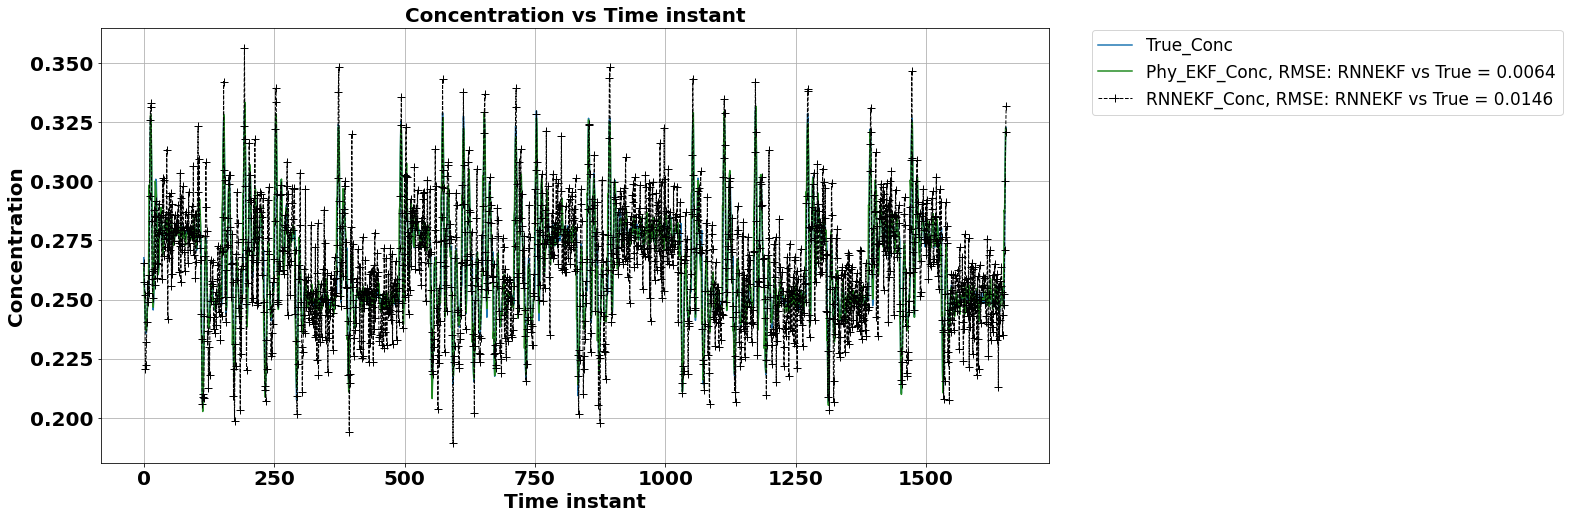

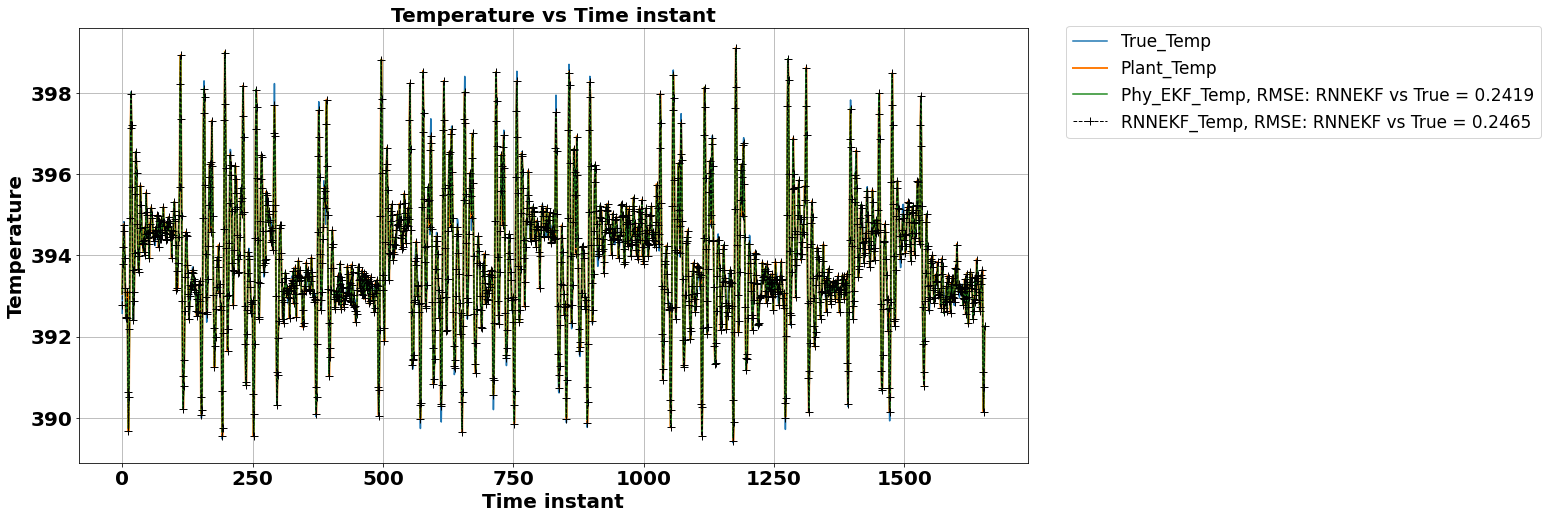

In [68]:
time = np.arange(0,len(x_est_app2[:1656,0]))

plt.figure(figsize=(17,8))
plt.plot(time,outputnew_noisy[:1655,0],label='True_Conc')
#plt.plot(time,plantnew[:1655,0],label='Plant_Height1')
plt.plot(time,mech_EKF_result[:1655,0],label='Phy_EKF_Conc, RMSE: RNNEKF vs True = {0:.4f}'.format(RMSE_phyEKF_conc),color='forestgreen')
plt.plot(time,x_est_app2[:1655,16],'k+--',label='RNNEKF_Conc, RMSE: RNNEKF vs True = {0:.4f}'.format(RMSE_EKF_conc),linewidth=1,markersize=7.5)
#plt.plot([],[],label='RMSE Height1_EKF vs True_height1 = {0:.4f}'.format(RMSE_height1))
#plt.plot([],[],label='RMSE Height1_model vs True_height1 = {0:.4f}'.format(RMSE_height1_model))
plt.legend(bbox_to_anchor=(1.55, 0.78),loc='lower right',fontsize=17)
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Concentration',fontsize=20, fontweight='bold')
plt.title('Concentration vs Time instant',fontsize=20, fontweight='bold')

plt.figure(figsize=(17,8))
plt.plot(time,outputnew_noisy[:1655,1],label='True_Temp')
plt.plot(time,plantnew[:1655,0],label='Plant_Temp',linewidth=2)
plt.plot(time,mech_EKF_result[:1655,1],label='Phy_EKF_Temp, RMSE: RNNEKF vs True = {0:.4f}'.format(RMSE_phyEKF_temp),color='forestgreen')
plt.plot(time,x_est_app2[:1656,17],'k+--',label='RNNEKF_Temp, RMSE: RNNEKF vs True = {0:.4f}'.format(RMSE_EKF_temp),linewidth=1,markersize=7.5)
plt.legend(bbox_to_anchor=(1.55, 0.727),loc='lower right',fontsize=17)
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Temperature',fontsize=20, fontweight='bold')
plt.title('Temperature vs Time instant',fontsize=20, fontweight='bold')

#MISC

In [ ]:
# CONVERTING CONC BACK TO NON SCALED
temp = target
temp[:,0] = target[:,0]/100

In [ ]:
print(temp)

[[2.6088e-01 3.9270e+02]
 [2.6905e-01 3.9333e+02]
 [2.4394e-01 3.9391e+02]
 ...
 [2.8222e-01 3.9511e+02]
 [2.6220e-01 3.9535e+02]
 [2.7492e-01 3.9472e+02]]


In [ ]:
temp_past= np.zeros((len(temp)+1,2))

for i in range(len(temp)):

    temp_past[i+1] = temp[i] 

In [ ]:
print(temp_past[200:210])
print(temp[200:210])

Text(0.5, 1.0, 'For concentration')

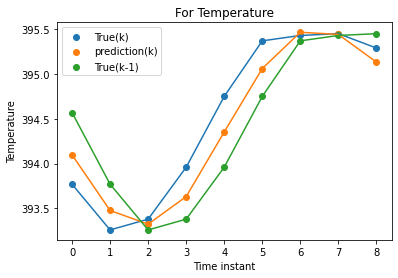

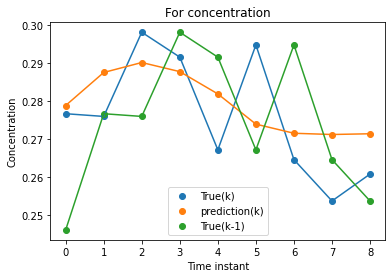

In [ ]:
x= [i for i in range(9)]
# plt.figure(1)
# plt.scatter(x,temp_past[1:10,0],label='one past')
# plt.scatter(x,temp[1:10,0], label='True')
# plt.legend()
# plt.title('For concentration')

plt.figure(1)
plt.plot(temp[211:220,1])
plt.plot(p[11:20,1])
plt.plot(temp_past[211:220,1])

plt.scatter(x,temp[211:220,1], label='True(k)')
plt.scatter(x,p[11:20,1], label='prediction(k)')
plt.scatter(x,temp_past[211:220,1],label='True(k-1)')
plt.legend()
plt.xlabel('Time instant')
plt.ylabel('Temperature')
plt.title('For Temperature')


plt.figure(2)
plt.plot(temp[211:220,0])
plt.plot(p[11:20,0])
plt.plot(temp_past[211:220,0])

plt.scatter(x,temp[211:220,0], label='True(k)')
plt.scatter(x,p[11:20,0], label='prediction(k)')
plt.scatter(x,temp_past[211:220,0],label='True(k-1)')
#plt.scatter(x,temp[1:10,1], label='True')

plt.xlabel('Time instant')
plt.ylabel('Concentration')
plt.legend()
plt.title('For concentration')



<Figure size 432x288 with 0 Axes>

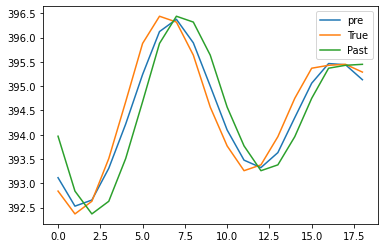

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(1)
plt.plot(p[1:20,1],label='pre')
plt.plot(temp[201:220,1],label='True')
plt.plot(temp_past[201:220,1], label='Past')
plt.legend()

plt.figure(2)
